In [23]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot


ImportError: Traceback (most recent call last):
  File "C:\Users\MUICT\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\pywrap_tensorflow.py", line 64, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [2]:
# Reference for Building model part: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# import the .CSV file

item_matrix = pd.read_csv('db_test_2803.csv')
item_matrix = item_matrix.drop(columns=['user'])
item_matrix = item_matrix.astype(int)
item_matrix.fillna(0)

user_item_matrix = pd.read_csv('db_test_2803.csv')
user_item_matrix = user_item_matrix.astype(int)
user_item_matrix.fillna(0)

,user,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24,c_25
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,305,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
305,306,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
306,307,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307,308,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# define a function named get_cosine() as Aj. Ananta comment

def get_cosine(vec1,vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum ([vec1[x] * vec2[x] for x in intersection])
    
    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    
    if not denominator:
        return 0.0
    else:
        return float(numerator)/denominator

In [5]:
# Create new DataFrame matrix for keeping the cosine similarity value

item_item_matrix = pd.DataFrame(index=item_matrix.columns,columns=item_matrix.columns)
item_item_matrix.head(5)

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24,c_25
d_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Fill in each index as cosine similarity value by called the get_cosine() function

for i in range(0,len(item_item_matrix.columns)) :
    for j in range(0,len(item_item_matrix.columns)) :
        if i==j:
            item_item_matrix.iloc[i,j] = 0
        else:
            item_item_matrix.iloc[i,j] = get_cosine(item_matrix.iloc[:,i],item_matrix.iloc[:,j])
    
item_item_matrix



,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24,c_25
d_1,0,0.32051,0.373773,0.348991,0.575829,0.608781,0.367109,0.473249,0.602475,0.38949,...,0.162221,0.191943,0.169278,0.191346,0.177705,0.236842,0.150619,0.187317,0.266557,0.210866
d_2,0.32051,0,0.45257,0.484706,0.352517,0.316862,0.30572,0.432291,0.305741,0.47061,...,0.131717,0.185535,0.147264,0.194206,0.180361,0.249286,0.142679,0.211241,0.240481,0.183444
d_3,0.373773,0.45257,0,0.494312,0.430458,0.280056,0.52775,0.495284,0.40534,0.499134,...,0.266789,0.20498,0.235008,0.250319,0.265684,0.334428,0.247708,0.23338,0.309965,0.270226
d_4,0.348991,0.484706,0.494312,0,0.401918,0.294174,0.45334,0.495479,0.420517,0.466041,...,0.226455,0.248807,0.270064,0.233723,0.206725,0.257151,0.25231,0.261488,0.268742,0.189233
d_5,0.575829,0.352517,0.430458,0.401918,0,0.48795,0.500216,0.517769,0.596377,0.492805,...,0.135225,0.171429,0.151186,0.174456,0.154303,0.246784,0.188329,0.22771,0.277746,0.219718
d_6,0.608781,0.316862,0.280056,0.294174,0.48795,0,0.351763,0.463184,0.562859,0.420813,...,0.173205,0.219578,0.150616,0.212814,0.237171,0.210732,0.160817,0.166667,0.210819,0.160817
d_7,0.367109,0.30572,0.52775,0.45334,0.500216,0.351763,0,0.533229,0.42023,0.597081,...,0.243709,0.205971,0.2076,0.205331,0.222475,0.254152,0.258603,0.301511,0.286039,0.193952
d_8,0.473249,0.432291,0.495284,0.495479,0.517769,0.463184,0.533229,0,0.568815,0.600375,...,0.233384,0.221901,0.260931,0.19356,0.266312,0.283949,0.297951,0.280717,0.319574,0.189605
d_9,0.602475,0.305741,0.40534,0.420517,0.596377,0.562859,0.42023,0.568815,0,0.54139,...,0.185695,0.219718,0.166091,0.246414,0.203419,0.210866,0.206897,0.214423,0.203419,0.172414
d_10,0.38949,0.47061,0.499134,0.466041,0.492805,0.420813,0.597081,0.600375,0.54139,0,...,0.171499,0.20292,0.178958,0.177003,0.219179,0.222566,0.191079,0.264039,0.219179,0.159232


In [7]:
# Reference : https://medium.com/sfu-cspmp/recommendation-systems-user-based-collaborative-filtering-using-n-nearest-neighbors-bf7361dc24e0
# define a function named find_n_neighbours()

def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [8]:
pet_rank_neighbours_matrix = find_n_neighbours(item_item_matrix,10)
pet_rank_neighbours_matrix.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
d_1,d_6,d_9,d_5,d_23,d_20,d_26,d_18,d_12,d_15,d_16
d_2,d_17,d_4,d_10,d_3,d_19,d_8,d_12,d_20,d_23,d_13
d_3,d_7,d_10,d_11,d_8,d_4,d_19,d_24,d_25,d_2,d_13
d_4,d_11,d_17,d_19,d_8,d_3,d_2,d_23,d_24,d_13,d_25
d_5,d_12,d_9,d_1,d_23,d_20,d_8,d_7,d_10,d_17,d_6


In [9]:

user=100
user_index = user_item_matrix[user_item_matrix.user == user].index.tolist()[0]

user_liked_list = user_item_matrix.loc[user_index]
user_liked_list = user_liked_list[user_liked_list>0].index.values
       
#calculate the score
ranking_score = item_item_matrix.dot(item_matrix.loc[user_index]).div(item_item_matrix.sum(axis=1))
ranking_10_score= ranking_score.sort_values(ascending=False)

print(" ")
print("The Pet Recommendations for User Id : {}".format(user))
print(" ")

print (user_liked_list)
print (ranking_10_score.head(10))


 
The Pet Recommendations for User Id : 100
 
['user' 'd_15' 'c_3']
d_26    0.0545439
d_16    0.0520152
d_18    0.0519297
c_19    0.0507271
d_22     0.050556
d_6     0.0505035
c_8      0.048671
c_13    0.0483416
d_20    0.0472279
d_17    0.0465327
dtype: object


In [10]:
# Reference: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

# Create a Validation Dataset
# Split-out validation dataset
array = user_item_matrix.values
X = array[:,0:50]
y = array[:,50]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [11]:
X_train
X_train.shape

(247, 50)

In [12]:
X_validation
X_validation.shape

(62, 50)

In [13]:
Y_train
Y_train.shape

(247,)

In [14]:
Y_validation
Y_validation.shape

(62,)

In [15]:
# Build Models

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.939500 (0.032370)
LDA: 0.927000 (0.024931)
KNN: 0.903000 (0.018824)
CART: 0.894833 (0.031802)
NB: 0.826167 (0.081609)
SVM: 0.903000 (0.018824)


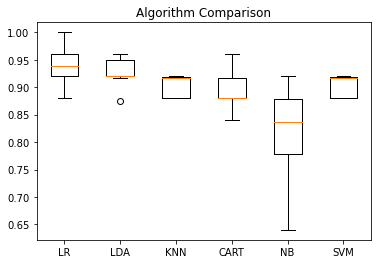

In [16]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [17]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [18]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9193548387096774
[[57  0]
 [ 5  0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        57
           1       0.00      0.00      0.00         5

    accuracy                           0.92        62
   macro avg       0.46      0.50      0.48        62
weighted avg       0.85      0.92      0.88        62



C:\Users\MUICT\.conda\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

ImportError: Traceback (most recent call last):
  File "C:\Users\MUICT\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\pywrap_tensorflow.py", line 64, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [21]:
# Part of save model into the .ckpt file by using Tensorflow
# Reference : https://stackoverflow.com/questions/33759623/tensorflow-how-to-save-restore-a-model

# Create some variables.
v1 = tf.get_variable("v1", shape=[50], initializer = tf.zeros_initializer)
v2 = tf.get_variable("v2", shape=[50], initializer = tf.zeros_initializer)

inc_v1 = v1.assign(v1+1)
dec_v2 = v2.assign(v2-1)

# Add an op to initialize the variables.
init = tf.global_variables_initializer()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

with tf.Session() as session:
    epochs = 20
    batch_size = 32

    session.run(init)
    # Do some work with the model.
    inc_v1.op.run()
    dec_v2.op.run()
    # Save the variables to disk.
    save_path = saver.save(session, "/tmp_test/model.ckpt")
    print("Model saved in path: %s" % save_path)


NameError: name 'tf' is not defined

In [22]:
# Reference : https://stackoverflow.com/questions/33759623/tensorflow-how-to-save-restore-a-model

tf.reset_default_graph()

# Create some variables.
v1 = tf.get_variable("v1", shape=[50])
v2 = tf.get_variable("v2", shape=[50])

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.
with tf.Session() as sess:
  # Restore variables from disk.
  saver.restore(sess, "/tmp_test/model.ckpt")
  print("Model restored.")
  # Check the values of the variables
  print("v1 : %s" % v1.eval())
  print("v2 : %s" % v2.eval())


NameError: name 'tf' is not defined

In [ ]:
# Reference : https://stackoverflow.com/questions/33759623/tensorflow-how-to-save-restore-a-model
# Part of converting the .ckpt file into the .pb file

import os
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

trained_checkpoint_prefix = 'tmp_test/model.ckpt'
export_dir = os.path.join('export_dir_test', '0')

graph = tf.Graph()
with tf.Session(graph=graph) as sess:
    # Restore from checkpoint
    loader = tf.train.import_meta_graph(trained_checkpoint_prefix + '.meta')
    loader.restore(sess, trained_checkpoint_prefix)

    # Export checkpoint to SavedModel
    builder = tf.saved_model.builder.SavedModelBuilder(export_dir)
    builder.add_meta_graph_and_variables(sess,
                                         [tf.saved_model.TRAINING, tf.saved_model.SERVING],
                                         strip_default_attrs=True)
    builder.save()         

In [ ]:
# Reference : https://www.tensorflow.org/lite/convert/python_api
# Part of converting the .pb file into the .tflite file   

import tensorflow as tf

saved_model_path = "./export_dir_test/0"
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
tflite_model = converter.convert()
open("./saved_models_test/converted_model_test.tflite", "wb").write(tflite_model)
